In [1]:
!pip install tf-nightly-2.0-preview


ERROR: Could not find a version that satisfies the requirement tf-nightly-2.0-preview (from versions: none)
ERROR: No matching distribution found for tf-nightly-2.0-preview


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.2.0-rc2


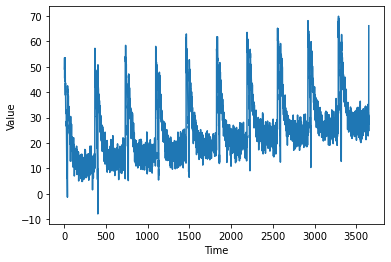

In [3]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.1,
                    np.cos(season_time * 6 * np.pi),
                    2 / np.exp(9 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(10 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.005
noise_level = 3

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=51)

split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

plot_series(time, series)

In [0]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [0]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)




In [15]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis= -1),
                         input_shape = [None]),# YOUR CODE HERE),
  # YOUR CODE HERE
  tf.keras.layers.LSTM(units= 32, return_sequences = True),
  tf.keras.layers.LSTM(units = 32),
  # could also do it bidirectional
  #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences = True)),
  #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(units= 1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)# YOUR CODE HERE)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
94/94 [==============================] - 1s 6ms/step - loss: 21.1726 - mae: 21.7225 - lr: 1.0000e-08
Epoch 2/100
94/94 [==============================] - 1s 6ms/step - loss: 19.3412 - mae: 19.8633 - lr: 1.1220e-08
Epoch 3/100
94/94 [==============================] - 1s 6ms/step - loss: 17.2445 - mae: 17.7913 - lr: 1.2589e-08
Epoch 4/100
94/94 [==============================] - 1s 6ms/step - loss: 14.9863 - mae: 15.5270 - lr: 1.4125e-08
Epoch 5/100
94/94 [==============================] - 1s 6ms/step - loss: 12.5657 - mae: 13.0773 - lr: 1.5849e-08
Epoch 6/100
94/94 [==============================] - 1s 6ms/step - loss: 10.0635 - mae: 10.5885 - lr: 1.7783e-08
Epoch 7/100
94/94 [==============================] - 1s 6ms/step - loss: 7.8552 - mae: 8.3665 - lr: 1.9953e-08
Epoch 8/100
94/94 [==============================] - 1s 6ms/step - loss: 6.4161 - mae: 6.9202 - lr: 2.2387e-08
Epoch 9/100
94/94 [==============================] - 1s 6ms/step - loss: 5.7226 - mae: 6.2303 - lr: 

(1e-08, 0.0001, 0.0, 30.0)

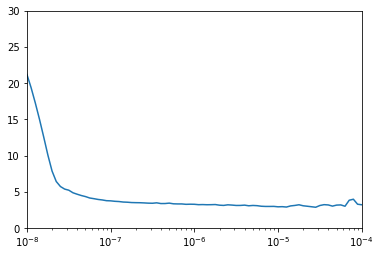

In [16]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])

# FROM THIS PICK A LEARNING RATE

In [17]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis= -1),
                         input_shape = [None]),# YOUR CODE HERE),
  # YOUR CODE HERE
  tf.keras.layers.LSTM(units= 32, return_sequences = True),
  tf.keras.layers.LSTM(units = 32),
  tf.keras.layers.Dense(units= 1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)# YOUR CODE HERE)
])

model.compile(loss="mse", 
              optimizer=tf.keras.optimizers.SGD(lr= 1e-5 # PUT YOUR LEARNING RATE HERE#
                                                            , momentum=0.9),
              metrics=["mae"]) # Mean Absolute Error
history = model.fit(dataset,epochs=500,verbose=1)
                                                            
# FIND A MODEL AND A LR THAT TRAINS TO AN MAE < 3                                                          

Epoch 1/500
94/94 [==============================] - 1s 6ms/step - loss: 176.0253 - mae: 8.8433
Epoch 2/500
94/94 [==============================] - 1s 6ms/step - loss: 37.6202 - mae: 4.0791
Epoch 3/500
94/94 [==============================] - 1s 6ms/step - loss: 31.4369 - mae: 3.7710
Epoch 4/500
94/94 [==============================] - 1s 6ms/step - loss: 33.4235 - mae: 3.9988
Epoch 5/500
94/94 [==============================] - 1s 6ms/step - loss: 28.9841 - mae: 3.6655
Epoch 6/500
94/94 [==============================] - 1s 6ms/step - loss: 27.5401 - mae: 3.5731
Epoch 7/500
94/94 [==============================] - 1s 6ms/step - loss: 32.0842 - mae: 3.9808
Epoch 8/500
94/94 [==============================] - 1s 6ms/step - loss: 29.9925 - mae: 3.8024
Epoch 9/500
94/94 [==============================] - 1s 6ms/step - loss: 29.6747 - mae: 3.7845
Epoch 10/500
94/94 [==============================] - 1s 6ms/step - loss: 30.4279 - mae: 3.8718
Epoch 11/500
94/94 [============================

In [44]:
print(len(series))
print(forecast)
print(series)
print(time)
print(window_size)
print(series[time:time + window_size])
print(series[time:time + window_size][np.newaxis])
# iterrate through time
time = 1
print("Time = 1")
print(series[time:time + window_size][np.newaxis])
print(model.predict(series[time:time + window_size][np.newaxis]))
time = 3600
print("Time = 3600")
print(series[time:time + window_size][np.newaxis])
print(model.predict(series[time:time + window_size][np.newaxis]))

3651
[array([[37.551346]], dtype=float32), array([[39.82651]], dtype=float32), array([[38.0972]], dtype=float32), array([[38.936886]], dtype=float32), array([[38.21241]], dtype=float32), array([[38.003098]], dtype=float32), array([[37.237194]], dtype=float32), array([[35.345276]], dtype=float32), array([[34.530224]], dtype=float32), array([[34.75548]], dtype=float32), array([[36.310463]], dtype=float32), array([[35.043953]], dtype=float32), array([[34.66908]], dtype=float32), array([[33.085423]], dtype=float32), array([[34.280758]], dtype=float32), array([[32.919147]], dtype=float32), array([[34.357136]], dtype=float32), array([[33.16543]], dtype=float32), array([[32.785244]], dtype=float32), array([[32.453735]], dtype=float32), array([[35.163612]], dtype=float32), array([[33.362675]], dtype=float32), array([[33.755684]], dtype=float32), array([[32.03894]], dtype=float32), array([[32.963207]], dtype=float32), array([[31.728672]], dtype=float32), array([[30.467848]], dtype=float32), arr

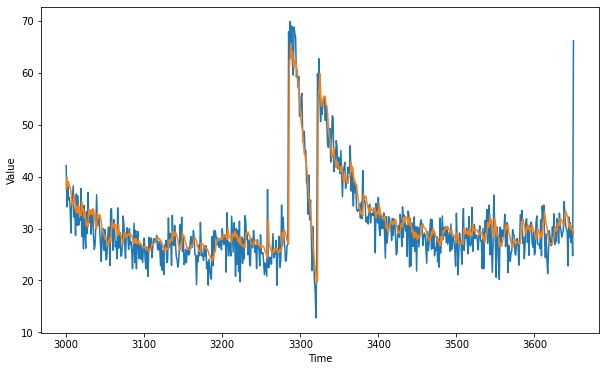

In [18]:
^forecast = []
results = []
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [19]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

# YOUR RESULT HERE SHOULD BE LESS THAN 4

2.9831047

In [0]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history.history['mae']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

epochs_zoom = epochs[200:]
mae_zoom = mae[200:]
loss_zoom = loss[200:]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()